In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\Admin\Downloads\archive (14)\loan.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
dataset.isnull().sum().sum()

np.int64(149)

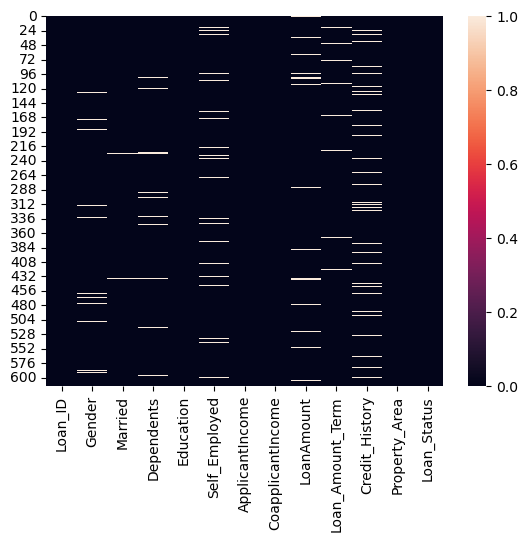

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

In [8]:
dataset.drop(columns=['Credit_History'], inplace=True)

In [9]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

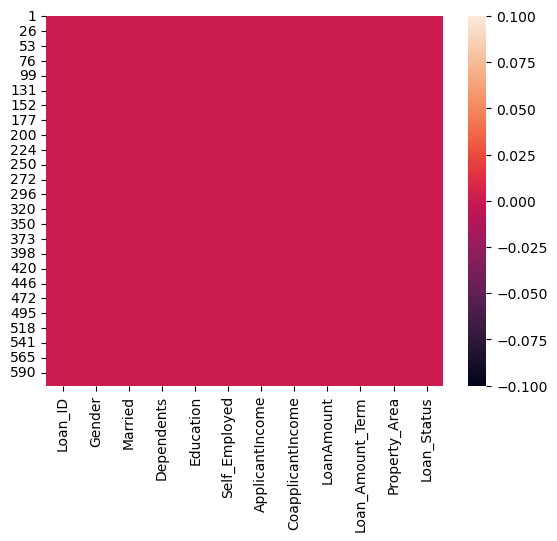

In [12]:
sns.heatmap(dataset.isnull())
plt.show()

In [18]:
dataset.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
dataset.select_dtypes(include='object').isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False


In [21]:
for i in dataset.select_dtypes(include='object').columns :
    print (i)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [22]:
from sklearn.impute import SimpleImputer

In [28]:
en_data = dataset[['Gender','Married']]

In [34]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [35]:
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()

In [38]:
pd.DataFrame(ar,columns=[['Gender_Female','Gender_Male','Married_No','Married_Yes']])

ValueError: Shape of passed values is (614, 6), indices imply (614, 4)

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe = OneHotEncoder()
ohe.fit_transform()

In [39]:
df = pd.DataFrame({'name':['wscube','cow','cat','dog','black']})
df

,name
0,wscube
1,cow
2,cat
3,dog
4,black


In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
df['en_data'] = le.fit_transform(df['name'])

In [43]:
df

,name,en_data
0,wscube,4
1,cow,2
2,cat,1
3,dog,3
4,black,0


In [44]:
la = LabelEncoder()
la.fit(dataset['Property_Area'])

LabelEncoder()

In [45]:
la.transform(dataset['Property_Area'])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

Ordinal Encoding

In [7]:
df = pd.DataFrame({'size': ['s','m','l','xl','s','m','l','s','s','l','xl','m']})
df.head(3)

,size
0,s
1,m
2,l


In [8]:
ord_data = [['s','m','l','xl']]

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[['size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [12]:
df['size_en'] = oe.transform(df[['size']])

In [13]:
df

,size,size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,s,0.0
8,s,0.0
9,l,2.0


In [14]:
ord_data1 = {'s':0,'m':1,'l':2,'xl':3}

In [16]:
df['size_en_map'] = df['size'].map(ord_data1)

In [17]:
df

,size,size_en,size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,m,1.0,1
6,l,2.0,2
7,s,0.0,0
8,s,0.0,0
9,l,2.0,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


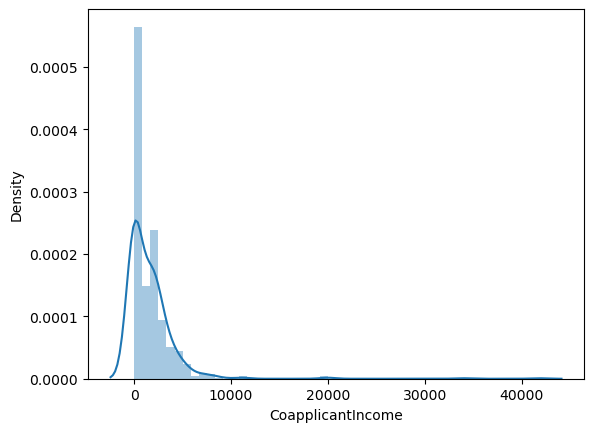

In [19]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

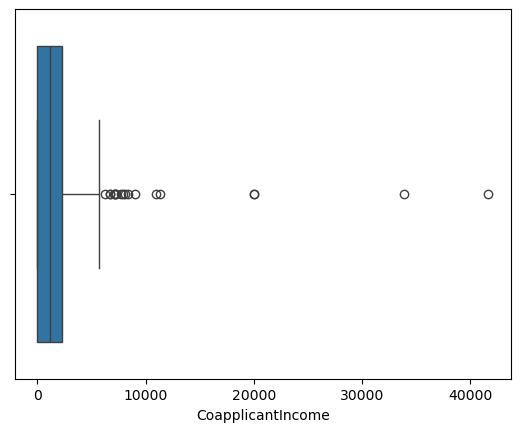

In [5]:
sns.boxplot(x = 'CoapplicantIncome', data= dataset)
plt.show()

In [6]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)

In [7]:
IQR = q3-q1

In [8]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

In [9]:
new_dataset = dataset[dataset['CoapplicantIncome']<=max_range]

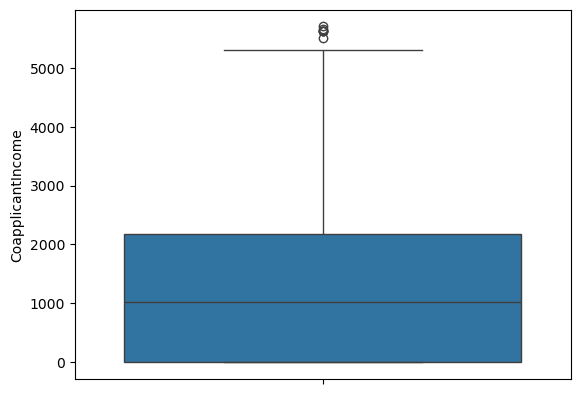

In [10]:
sns.boxplot(new_dataset['CoapplicantIncome'])
plt.show()

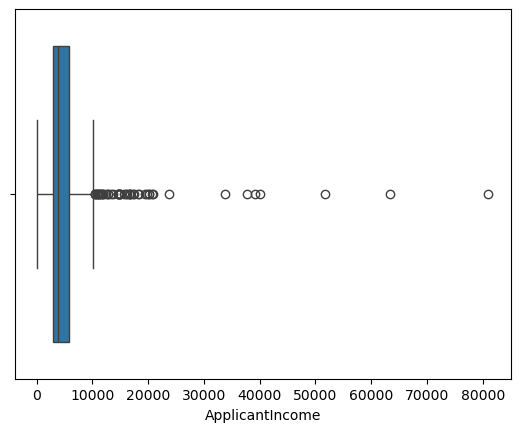

In [11]:
sns.boxplot(x = 'ApplicantIncome', data= dataset)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4640\1976060950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


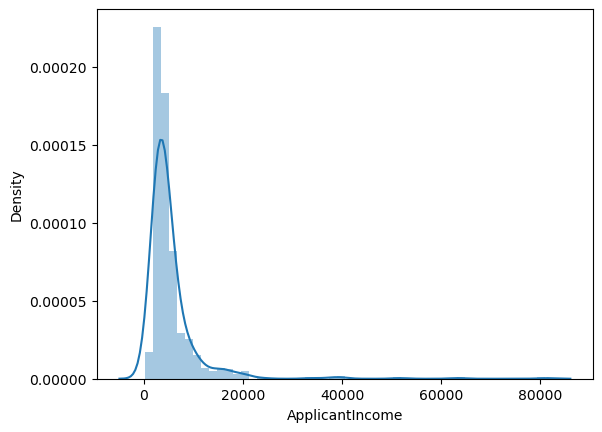

In [12]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [22]:
z_score = (dataset['ApplicantIncome'] - dataset['ApplicantIncome'].mean())/(dataset['ApplicantIncome'].std())

In [23]:
z_score

0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64

In [24]:
dataset['z_score'] = z_score

In [25]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.356773


In [28]:
new_dataset1 = dataset[(dataset['z_score']<3)]

In [29]:
new_dataset1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.356773


C:\Users\Admin\AppData\Local\Temp\ipykernel_4640\1603397141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset1['ApplicantIncome'])


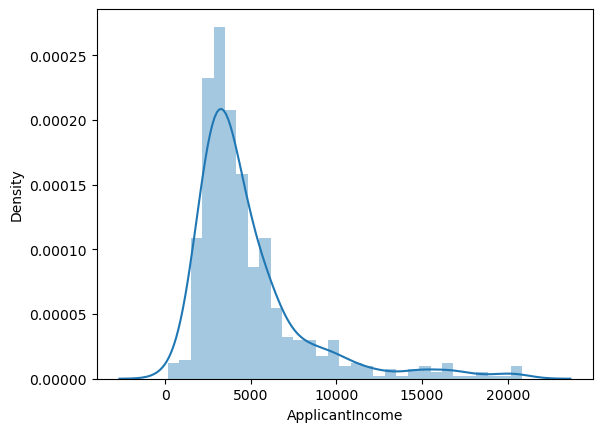

In [30]:
sns.distplot(new_dataset1['ApplicantIncome'])
plt.show()

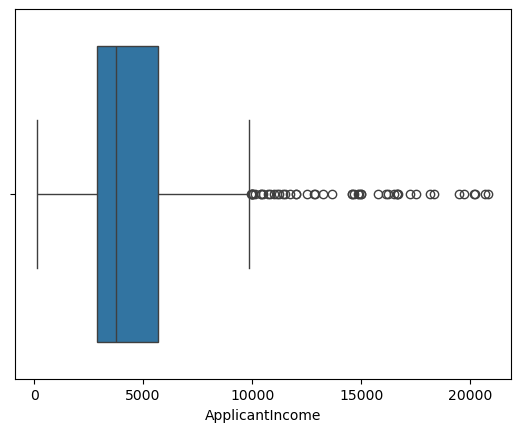

In [31]:
sns.boxplot(x = 'ApplicantIncome', data= new_dataset1)
plt.show()

In [3]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [4]:
ss = StandardScaler()
ss.fit(dataset[['ApplicantIncome']])

StandardScaler()

In [7]:
dataset['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(dataset[['ApplicantIncome']]),columns=['x'])

In [8]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [9]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\2354677882.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome_ss'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\2354677882.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


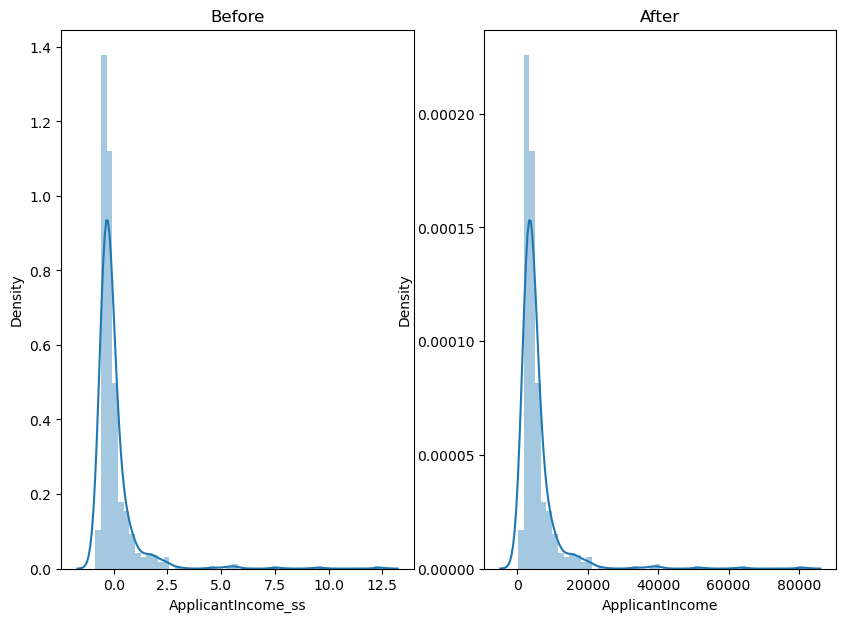

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['ApplicantIncome_ss'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


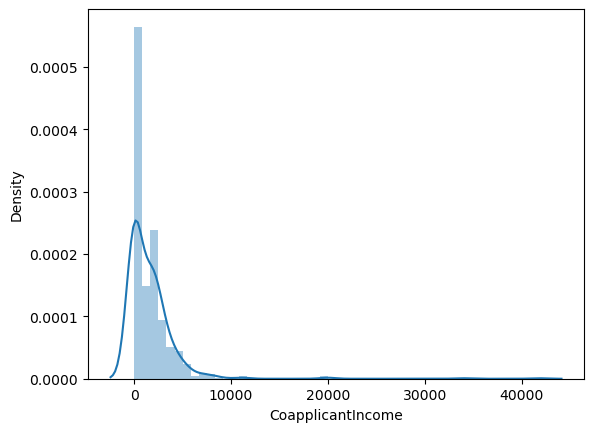

In [13]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
ms = MinMaxScaler()
ms.fit(dataset[['CoapplicantIncome']])

MinMaxScaler()

In [19]:
dataset['CoapplicantIncome_ms'] = ms.transform(dataset[['CoapplicantIncome']])

In [20]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_ms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\1662236900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\1662236900.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_ms'])


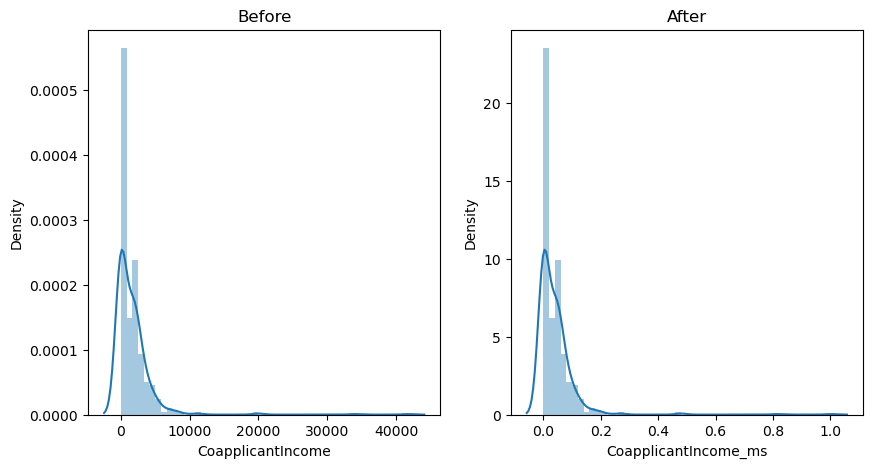

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['CoapplicantIncome_ms'])
plt.show()

In [26]:
data = {'name': ['a','b','c','d','a','c'], 'eng':[8,7,5,8,8,5],'hindi':[2,3,4,5,2,6]}

In [27]:
df = pd.DataFrame(data)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [31]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_ms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000


In [32]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [33]:
dataset.shape

(614, 15)

In [34]:
dataset.drop_duplicates(inplace=True)

In [35]:
dataset.shape

(614, 15)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                601 non-null    object 
 2   Married               611 non-null    object 
 3   Dependents            599 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  ApplicantIncome_ss    614 non-null    float64
 14  CoapplicantIncome_ms  614 non-null    float64
dtypes: float64(6), int64(1)

In [37]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [38]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\2291896846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)


In [39]:
dataset['Dependents'].replace('3+','3',inplace=True)

In [40]:
dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [43]:
dataset['Dependents'] = dataset['Dependents'].astype('int64')

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                601 non-null    object 
 2   Married               611 non-null    object 
 3   Dependents            614 non-null    int64  
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  ApplicantIncome_ss    614 non-null    float64
 14  CoapplicantIncome_ms  614 non-null    float64
dtypes: float64(6), int64(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


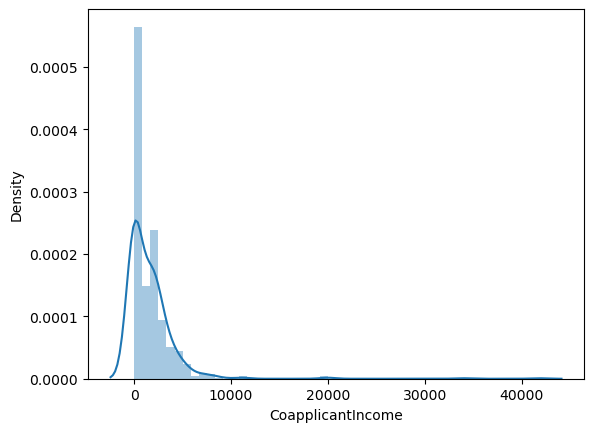

In [45]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [46]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
iqr =  q3-q1

In [47]:
min_r = q1-(1.5*iqr)
max_r = q1+(1.5*iqr)
min_r, max_r

(np.float64(-3445.875), np.float64(3445.875))

In [49]:
dataset = dataset[dataset['CoapplicantIncome']<=max_r]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


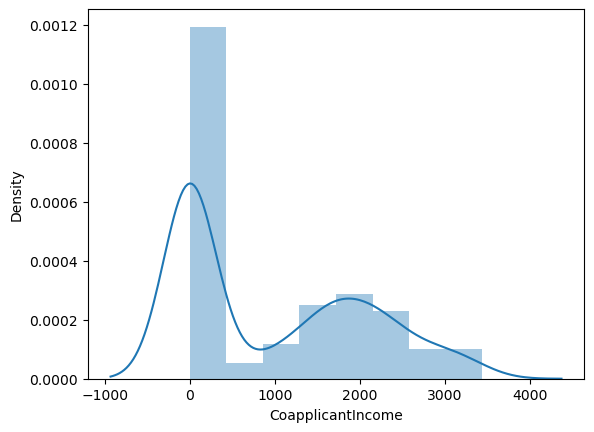

In [50]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [51]:
#function Transform
from sklearn.preprocessing import FunctionTransformer

In [56]:
ft = FunctionTransformer(func=np.log1p)         #1p means lagging datapoint by 1

In [57]:
ft.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [58]:
dataset['CoapplicantIncome_tf'] = ft.transform(dataset[['CoapplicantIncome']])

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\1227886159.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\1227886159.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf'])


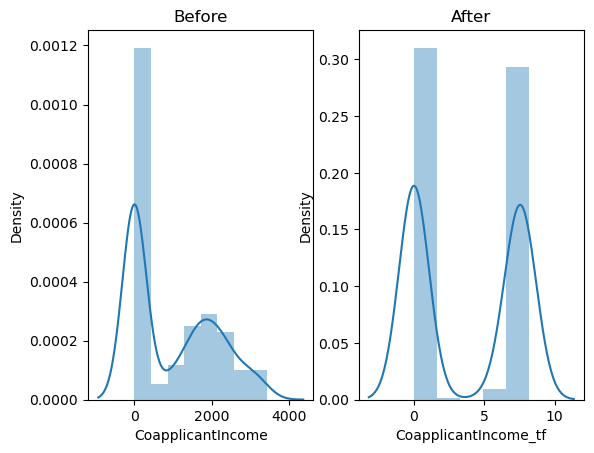

In [59]:
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['CoapplicantIncome_tf'])
plt.show()

In [64]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 281.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 508.4 kB/s eta 0:00:03
   ------------ --------------------------- 0.4/1.4 MB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.4 MB/s 

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [67]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\diabetes (2).csv')

In [68]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [69]:
x = data.iloc[:,:-1]
y = data['Outcome']

In [73]:
x.shape

(768, 8)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [79]:
fs = SequentialFeatureSelector(lr, k_features=7, forward=True)
fs.fit(x,y)

C:\Users\Admin\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(7, 7),
                          scoring='accuracy')

In [80]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [81]:
fs.k_feature_names_

('Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age')

In [82]:
fs.k_score_

np.float64(0.7734742381801205)

In [4]:
#Train-testsplitting
data1 = pd.read_csv(r'C:\Users\Admin\Downloads\BostonHousing.csv')
data1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
input_data = data1.iloc[::,-1]
output_data = data1['medv']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size =0.25)

In [11]:
x_test

5      28.7
296    27.1
272    24.4
105    19.5
432    16.1
       ... 
294    21.7
62     22.2
150    21.5
199    34.9
134    15.6
Name: medv, Length: 127, dtype: float64

In [12]:
#simple linear regression
data= pd.read_csv(r'C:\Users\Admin\Downloads\placementS.csv')
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [15]:
data.isnull().sum()

cgpa       0
package    0
dtype: int64

In [17]:
x = data[['cgpa']]
y = data['package']

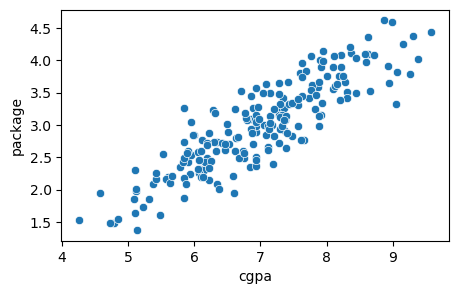

In [32]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='cgpa', y='package', data= data)
plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.predict([[6.89]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

In [28]:
lr.score(x_test,y_test)*100

77.30984312051673

In [29]:
lr.coef_

array([0.57425647])

In [30]:
lr.intercept_

np.float64(-1.02700693745421)

In [33]:
y_pred = lr.predict(x)

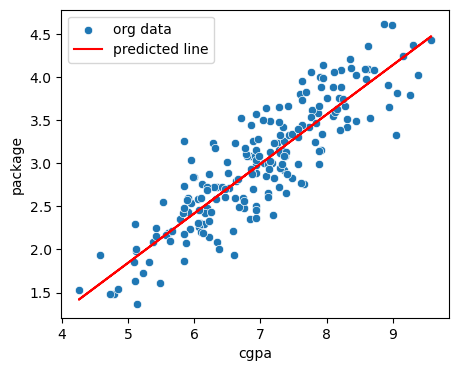

In [37]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='cgpa', y='package', data= data)
plt.plot(data['cgpa'],y_pred,color='red')
plt.legend(['org data','predicted line'])
plt.show()

In [38]:
# Multiplinear regression 
data = pd.read_csv(r'C:\Users\Admin\Downloads\Salary_Data.csv')
data.head(5)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [39]:
data.shape

(30, 3)

In [40]:
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

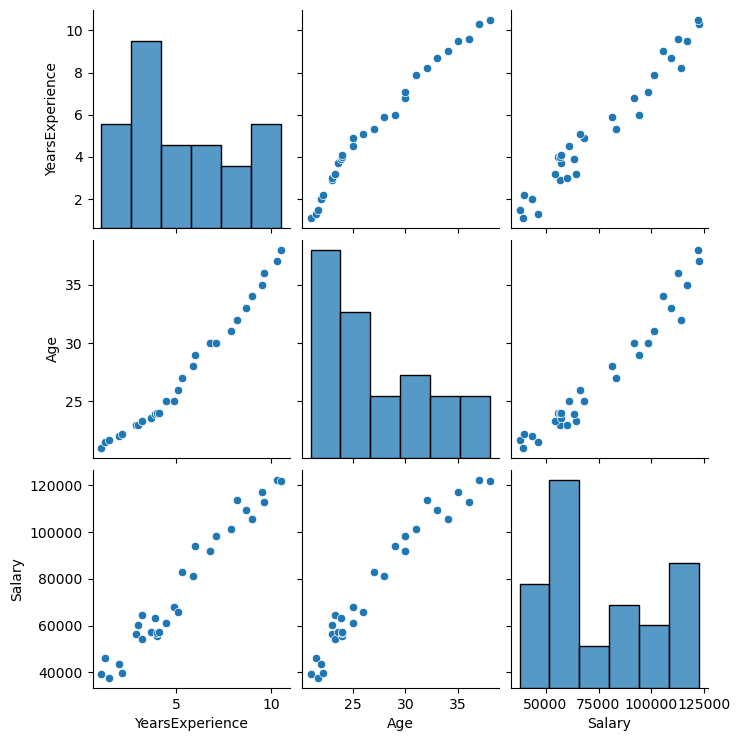

In [41]:
sns.pairplot(data=data)
plt.show()

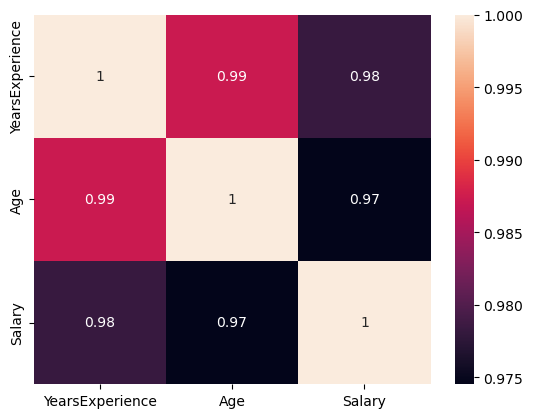

In [42]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [45]:
x = data[['YearsExperience', 'Age']]
y = data['Salary']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
lr.score(x_test,y_test)

0.8852101657216538

In [52]:
lr.coef_

array([4882.14850701, 2567.51865301])

In [53]:
lr.intercept_

np.float64(-20612.69192148534)

In [54]:
lr.predict(x_test)

array([118686.60525402,  67497.80208802, 101581.52273219,  74585.69879684,
        54833.367916  ,  58044.6977654 ])

In [3]:
# polinomial regression
data = pd.read_csv(r'C:\Users\Admin\Downloads\Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


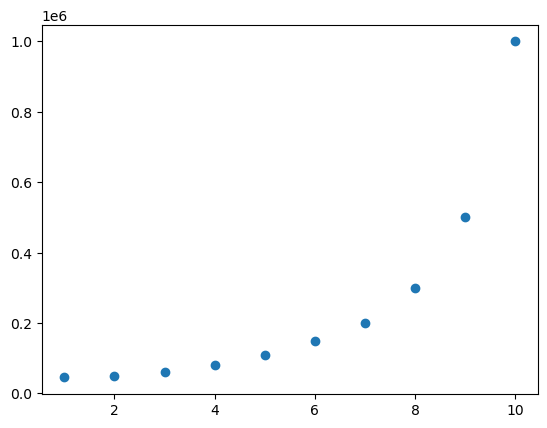

In [4]:
plt.scatter(data['Level'],data['Salary'])
plt.show()

In [6]:
data[['Level','Salary']].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [7]:
x = data[['Level']]
y = data['Salary']

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.score(x_test,y_test)

0.7666492889299867

In [16]:
y_pred = lr.predict(x)

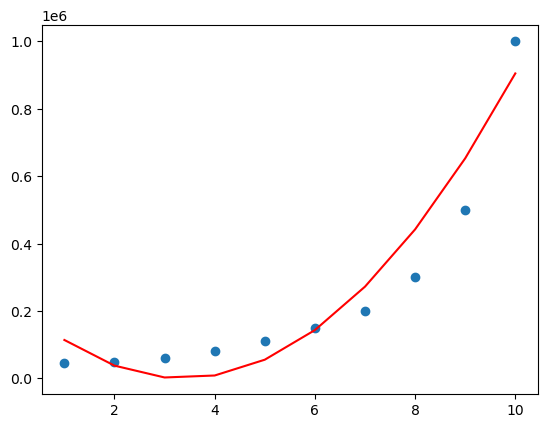

In [17]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred,c='red')
plt.show()

In [18]:
lr.coef_

array([      0.        , -137634.60994912,   20502.04918033])

In [19]:
lr.intercept_

np.float64(231288.51045788417)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\Housing.csv~\Housing.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
data = data.drop(['grade','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [16]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0


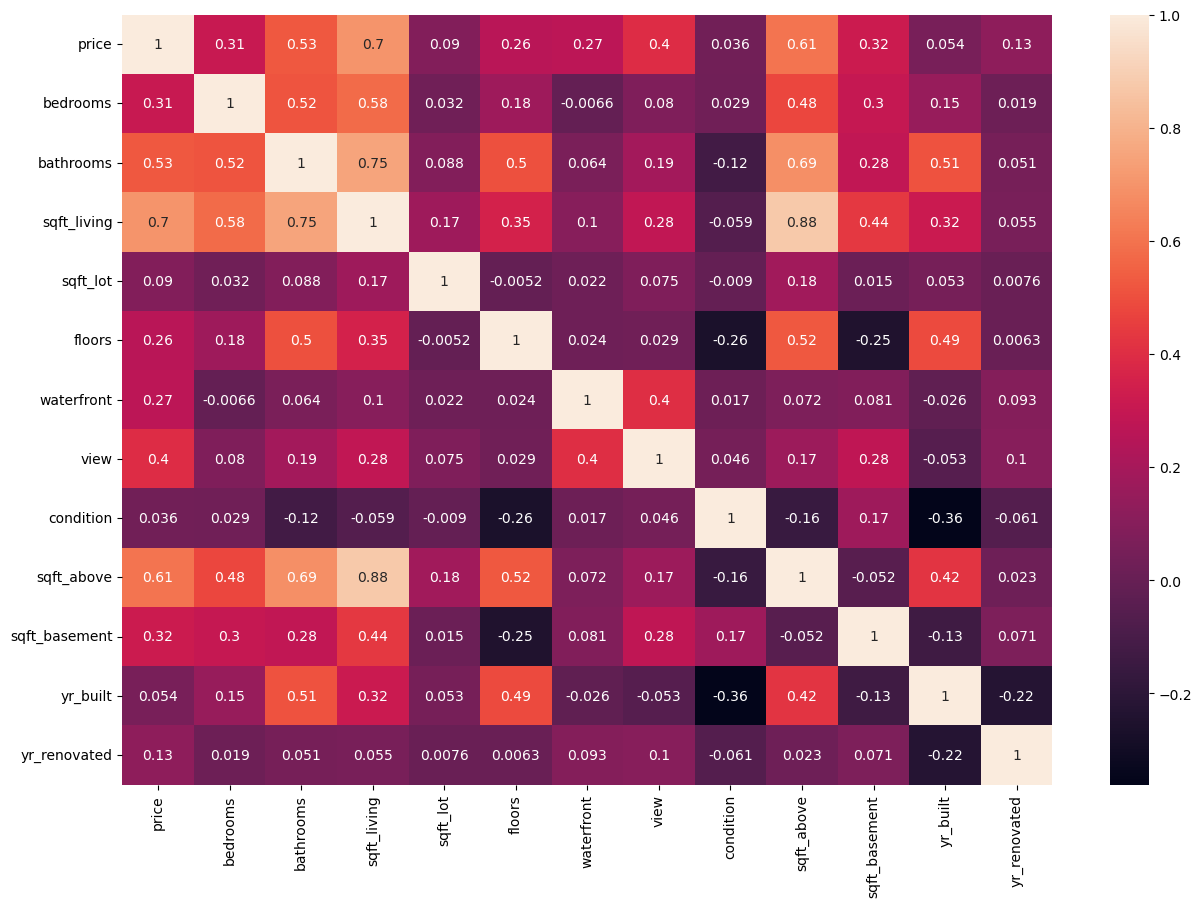

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [28]:
x = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y = data['price']

In [31]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398669,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,-0.312039,-0.658681,1.293542,-0.210128
21609,0.676503,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.629908,-0.658681,1.463768,-0.210128
21610,-1.473841,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.927928,-0.658681,1.293542,-0.210128
21611,-0.398669,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,-0.227505,-0.658681,1.123316,-0.210128


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

59.880111297339276

In [37]:
lr.coef_

array([-51404.41192683,  50470.91377582, 128798.5720784 , -15227.01154516,
        24780.65151746,  43709.28935693,  47826.43502124,  10953.72977996,
       117873.58327064,  46735.18222578, -85512.18525689,   4745.81932239])

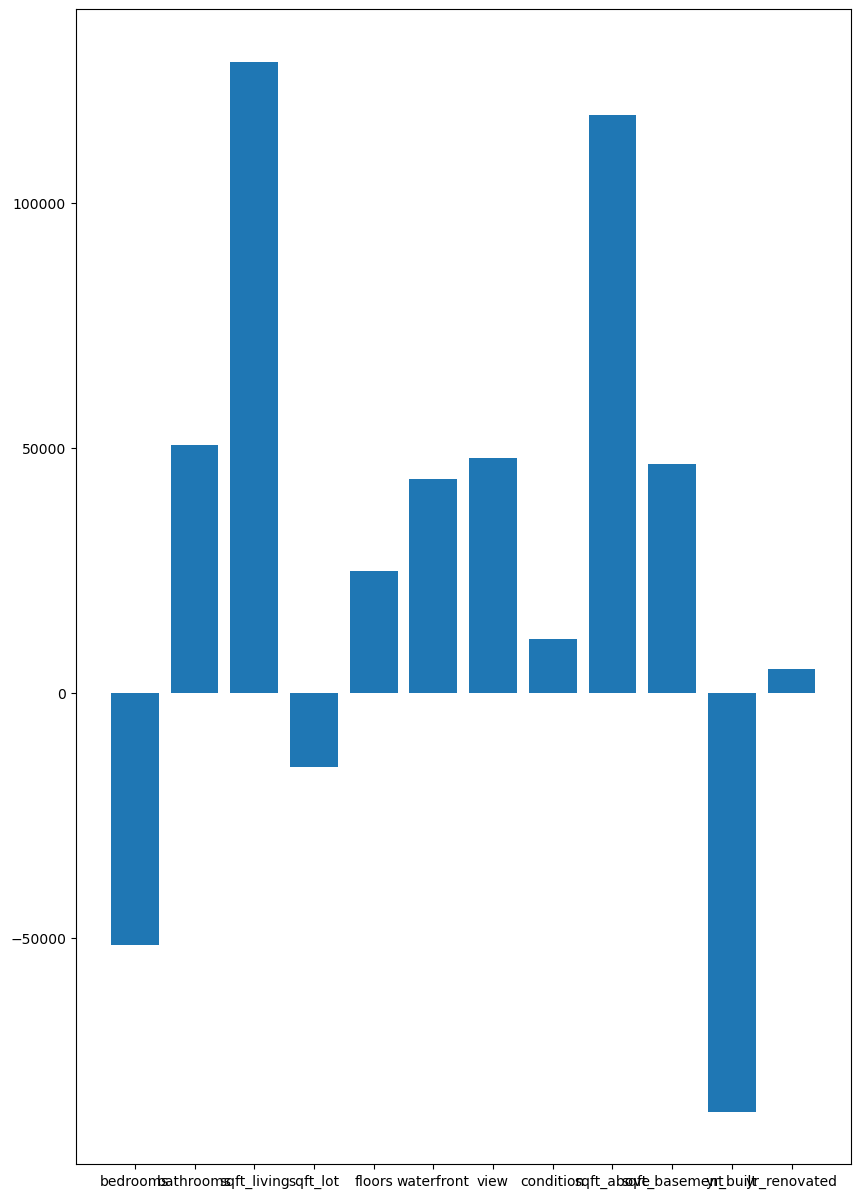

In [42]:
plt.figure(figsize=(10,15))
plt.bar(x.columns, lr.coef_)
plt.show()

In [46]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\Admin\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


59.88012233751449

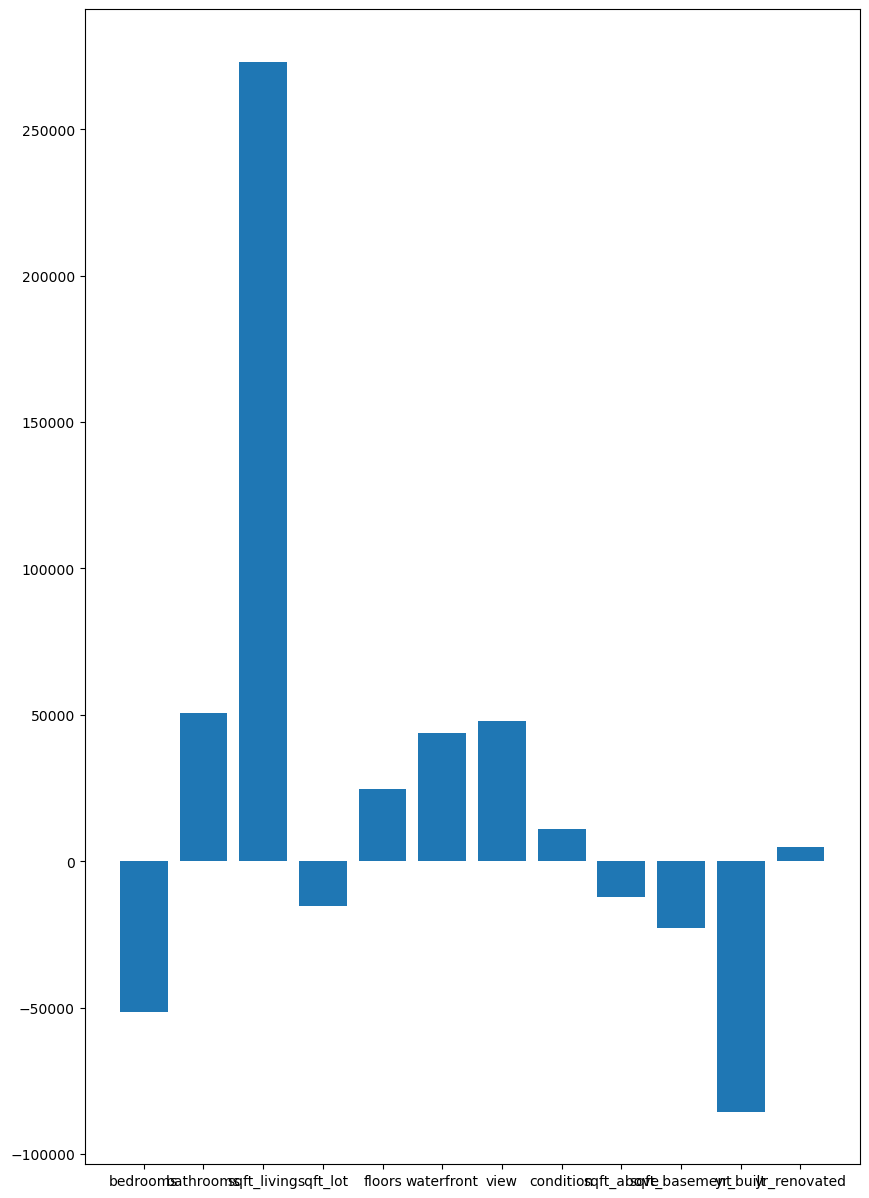

In [47]:
plt.figure(figsize=(10,15))
plt.bar(x.columns, la.coef_)
plt.show()

In [48]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

59.87968836897315

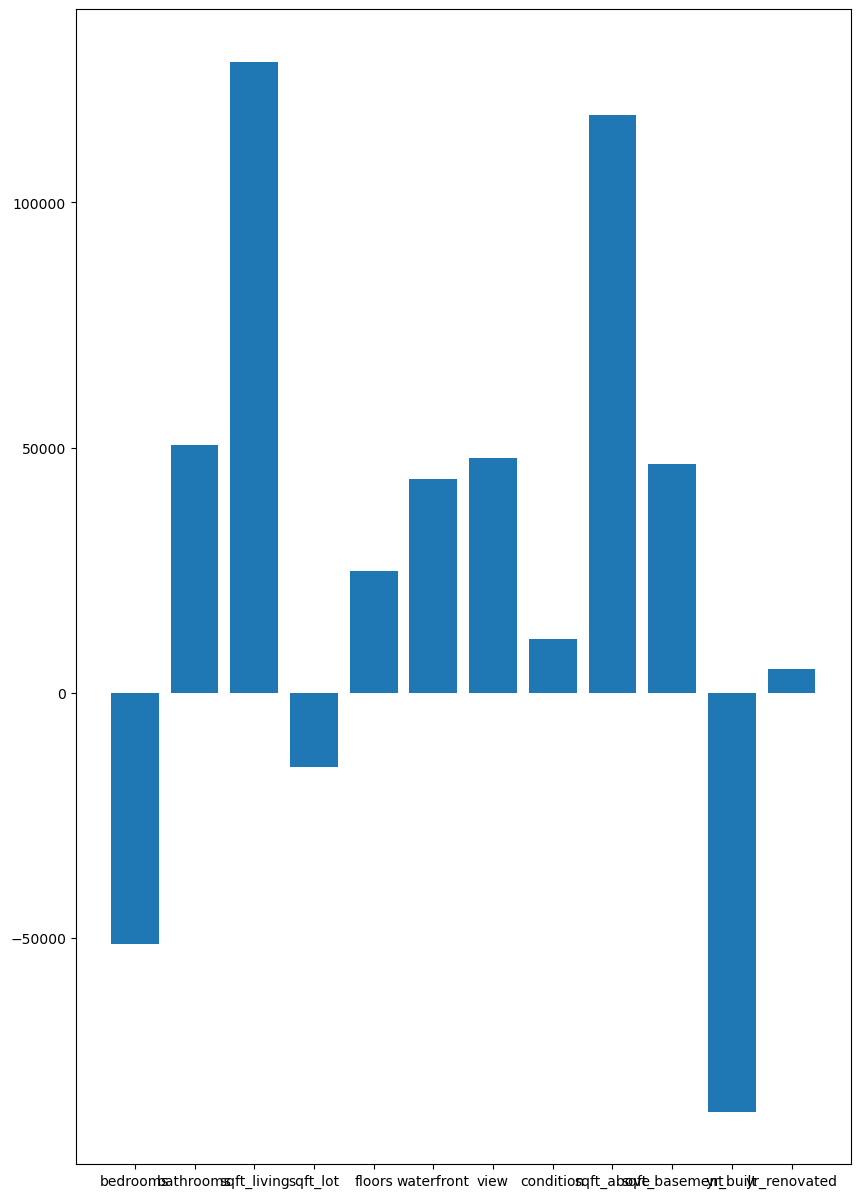

In [49]:
plt.figure(figsize=(10,15))
plt.bar(x.columns, ri.coef_)
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
mean_squared_error(y_test,lr.predict(x_test))

60651928701.792496

In [56]:
mean_absolute_error(y_test,lr.predict(x_test))

158277.11204656784

In [57]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

np.float64(246276.12288200515)

In [58]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

60651912011.6186
158277.14036440244
246276.08899691948


In [59]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

60652568070.991615
158264.4841813291
246277.42095245275


# Logistic Regression Single Input

In [60]:
df = pd.DataFrame({'col_name': x.columns, 'LinearRegression': lr.coef_, 'LassoRegression':la.coef_, 'RidgeRegression':ri.coef_})
df

,col_name,LinearRegression,LassoRegression,RidgeRegression
0,bedrooms,-51404.411927,-51403.786922,-51286.554773
1,bathrooms,50470.913776,50467.644848,50452.310934
2,sqft_living,128798.572078,273070.628252,128709.044402
3,sqft_lot,-15227.011545,-15226.354782,-15192.522536
4,floors,24780.651517,24780.953003,24771.510804
5,waterfront,43709.289357,43708.964469,43693.733569
6,view,47826.435021,47826.242345,47844.942839
7,condition,10953.729780,10953.187237,10968.718782
8,sqft_above,117873.583271,-12204.228769,117785.054456
9,sqft_basement,46735.182226,-22784.369898,46715.036565


In [8]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\Social_Network_Ads (1).csv')
data = data.drop(['User ID','Gender'], axis=1)
data = data.drop(columns=['EstimatedSalary'], axis=1)
data

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


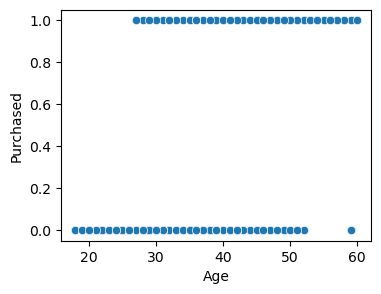

In [9]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age',y='Purchased',data=data)
plt.show()

In [10]:
x = data[['Age']]
y = data['Purchased']

In [22]:
x.shape

(400, 1)

In [23]:
y.shape

(400,)

In [27]:
X = x[:len(y)]

In [12]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
lr.score(x_test,y_test)

0.9125

In [40]:
lr.predict([[40]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

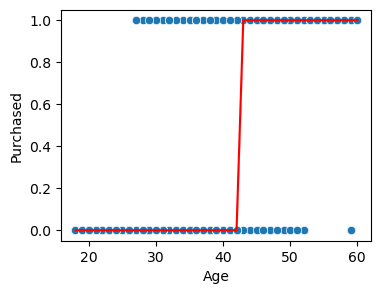

In [44]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age',y='Purchased',data=data)
sns.lineplot(x='Age',y=lr.predict(x),data=data,color='red')
plt.show()

# Logistic Regression Multiple Input

In [48]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\placement.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


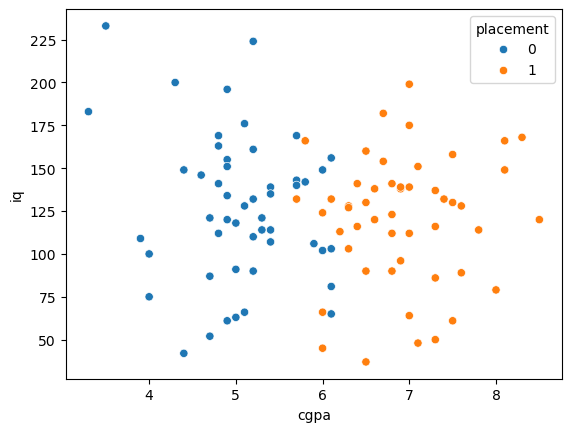

In [50]:
sns.scatterplot(x='cgpa', y='iq', data=data, hue='placement')
plt.show()

In [67]:
x = data[['cgpa','iq']]
y = data['placement']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [71]:
lr.score(x_test,y_test)

0.85

In [72]:
lr.predict([[6.8, 123.0]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [73]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


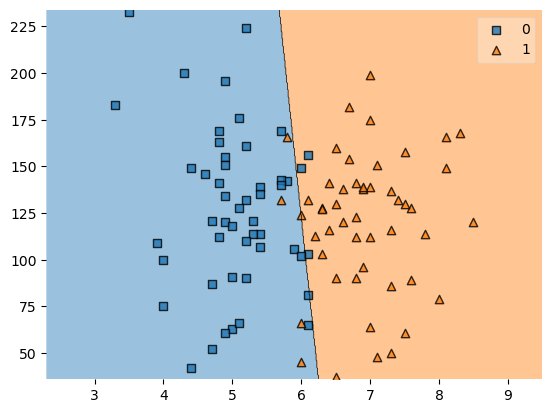

In [74]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

Polynomial binary 

Logistic Regression Multiclass classification

In [89]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\8836201-6f9306ad21398ea43cba4f7d537619d0e07d5ae3 (1)\8836201-6f9306ad21398ea43cba4f7d537619d0e07d5ae3\iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [90]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

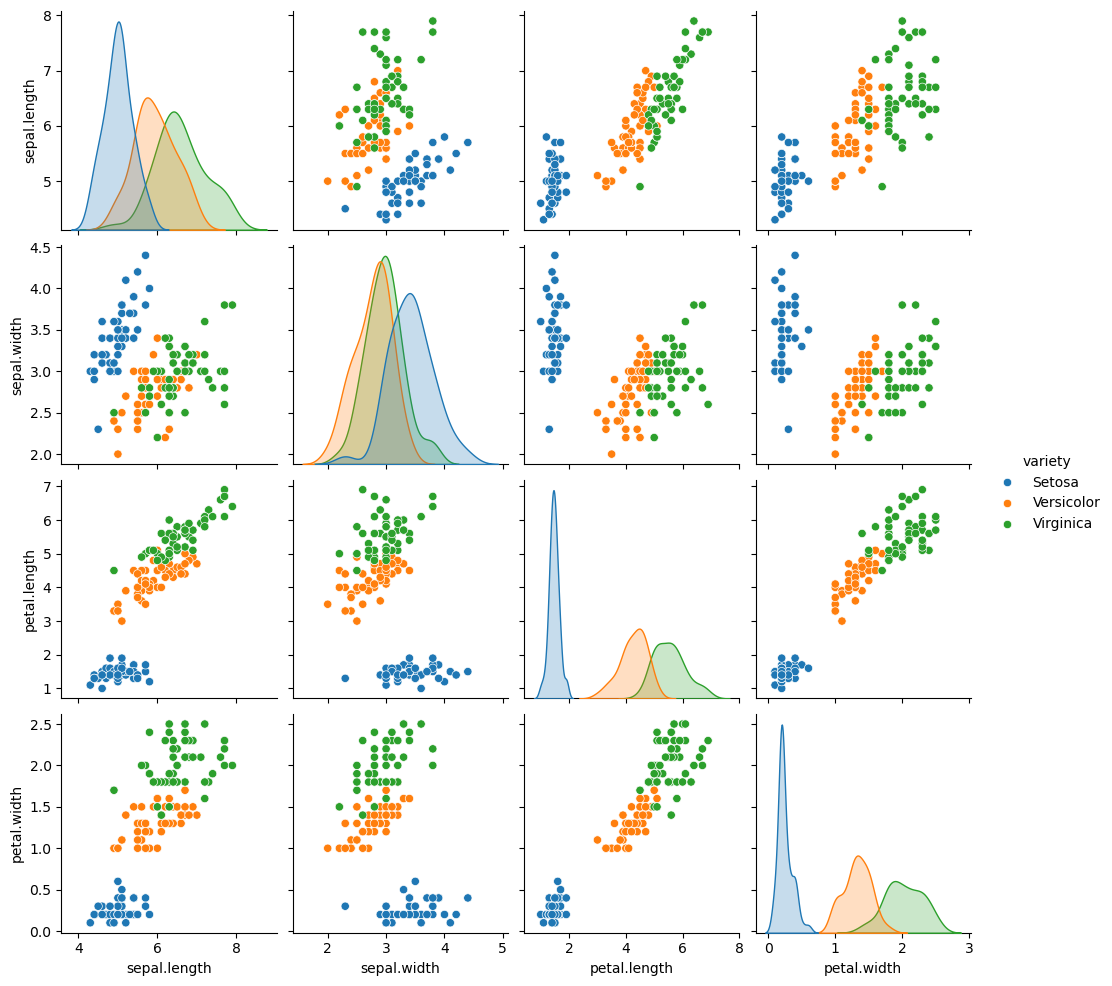

In [93]:
sns.pairplot(data=data, hue='variety')
plt.show()

In [94]:
x = data.iloc[:,:-1]
y = data['variety']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
#OVR

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)

C:\Users\Admin\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [99]:
lr.score(x_test,y_test)

0.9666666666666667

In [100]:
#multinomial

In [101]:
lr1 = LogisticRegression(multi_class='multinomial')
lr1.fit(x_train,y_train)

C:\Users\Admin\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [103]:
lr1.score(x_test,y_test)

1.0

In [105]:
lr2 = LogisticRegression()
lr2.fit(x_train,y_train)

LogisticRegression()

In [106]:
lr2.score(x_test,y_test)

1.0

Confusion Matrix

In [3]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\placement.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
x = data[['cgpa','iq']]
y = data['placement']

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [10]:
lr.score(x_test,y_test)

0.85

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [13]:
cf = confusion_matrix(y_test,lr.predict(x_test))

<Axes: >

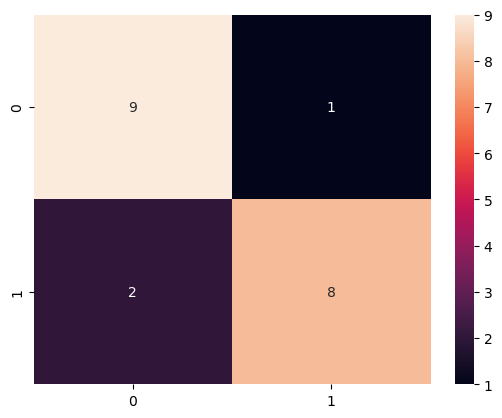

In [14]:
sns.heatmap(cf,  annot=True)
plt.show()

In [15]:
precision_score(y_test,lr.predict(x_test))

0.8888888888888888

In [16]:
recall_score(y_test,lr.predict(x_test))

0.8

In [17]:
f1_score(y_test,lr.predict(x_test))

0.8421052631578947

Imbalanced dataset

In [20]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\Social_Network_Ads (1).csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [21]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [22]:
x = data[['Age','EstimatedSalary']]
y = data['Purchased']

In [23]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
lr.score(x_test,y_test)

0.8875

In [27]:
lr.predict([[19,19000]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [28]:
lr.predict([[45,26000]])                   #wrong prediction becoz data is imbalanced and model is biased

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [29]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata


#Random Under sampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
ru = RandomUnderSampler()

In [36]:
ru_x, ru_y = ru.fit_resample(x,y)

In [37]:
ru_x

,Age,EstimatedSalary
129,26,84000
181,31,71000
387,39,71000
394,39,59000
288,41,79000
...,...,...
393,60,42000
395,46,41000
396,51,23000
397,50,20000


In [39]:
ru_y.value_counts()                      # balanced data with undersampling

Purchased
0    143
1    143
Name: count, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)

In [42]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
lr.score(x_test,y_test)

0.8103448275862069

In [44]:
lr.predict([[45,26000]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [45]:
# Random Over Sampling

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ro = RandomOverSampler()
ro_x,ro_y = ro.fit_resample(x,y)

In [50]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [51]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)

In [52]:
lr1 = LogisticRegression()
lr1.fit(x_train1, y_train1)

LogisticRegression()

In [53]:
lr1.score(x_test1, y_test1)

0.8737864077669902

In [54]:
lr1.predict([[45,26000]])

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Naive Bayes

In [55]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\placement.csv')
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [56]:
from mlxtend.plotting import plot_decision_regions

In [57]:
data.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

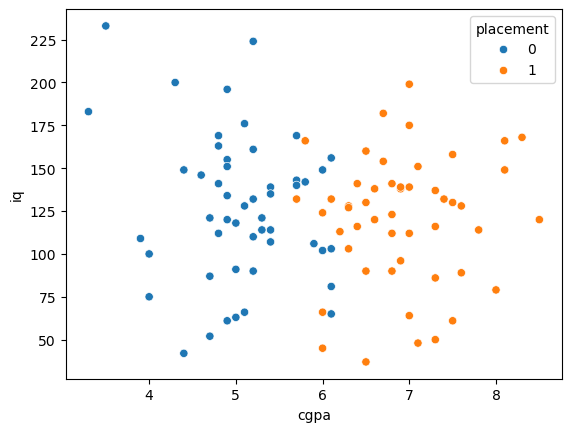

In [58]:
sns.scatterplot(x='cgpa',y='iq',data=data, hue='placement')
plt.show()

In [59]:
x = data[['cgpa','iq']]
y = data['placement']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

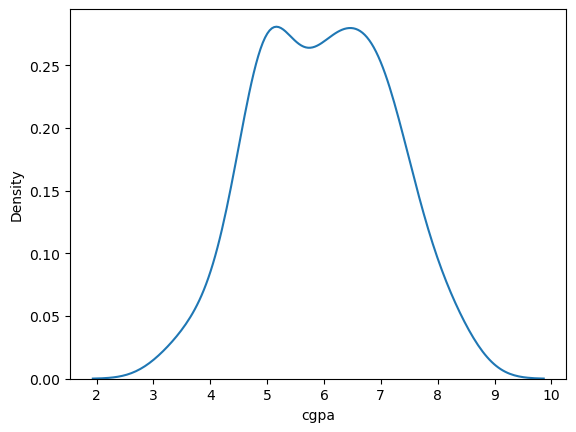

In [61]:
sns.kdeplot(data=data['cgpa'])
plt.show()

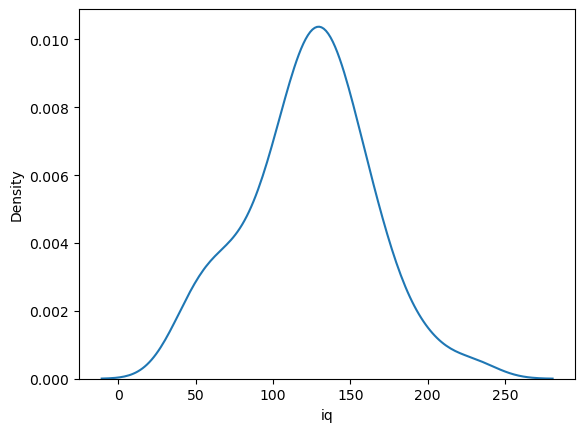

In [62]:
sns.kdeplot(data=data['iq'])
plt.show()

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [70]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [71]:
gnb.score(x_test,y_test)

0.85

In [72]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [74]:
mnb.score(x_test, y_test), mnb.score(x_test,y_test)*100

(0.95, 95.0)

In [75]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [77]:
bnb.score(x_test,y_test), bnb.score(x_train,y_train)

(0.5, 0.5)

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


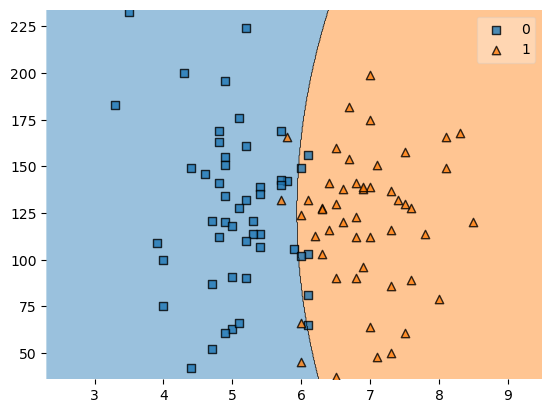

In [78]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


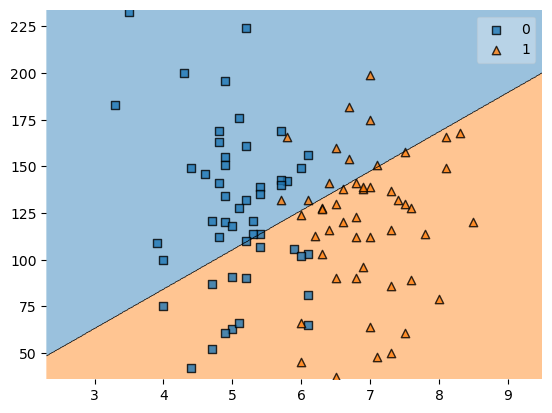

In [79]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()

C:\Users\Admin\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


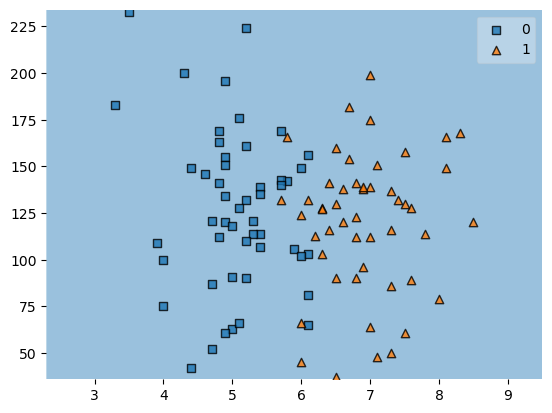

In [80]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show()